<a href="https://colab.research.google.com/github/rummi07/DV002/blob/main/Copy_of_DV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/sample_data/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
list(data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [4]:
data.shape[0]

8807

In [5]:
null_values = data.isnull().sum()
print("Null values in CSV file:")
print(null_values)

Null values in CSV file:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

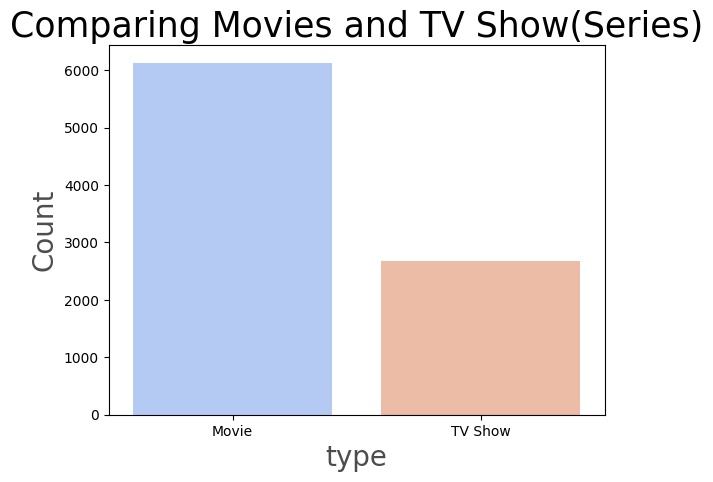

In [9]:
sns.countplot(x = 'type', data=data, palette='coolwarm')
plt.xlabel('type', fontsize=20, alpha=0.7)
plt.ylabel('Count', fontsize=20, alpha=0.7)
plt.title('Comparing Movies and TV Show(Series)', fontsize=25)
plt.show()

In [10]:
data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [11]:
data.groupby('rating').mean()

<ipython-input-11-62593d0a3112>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('rating').mean()


,release_year
rating,
66 min,2015.000000
74 min,2017.000000
84 min,2010.000000
G,1997.804878
NC-17,2015.000000
NR,2010.912500
PG,2008.428571
PG-13,2009.314286
R,2010.471840


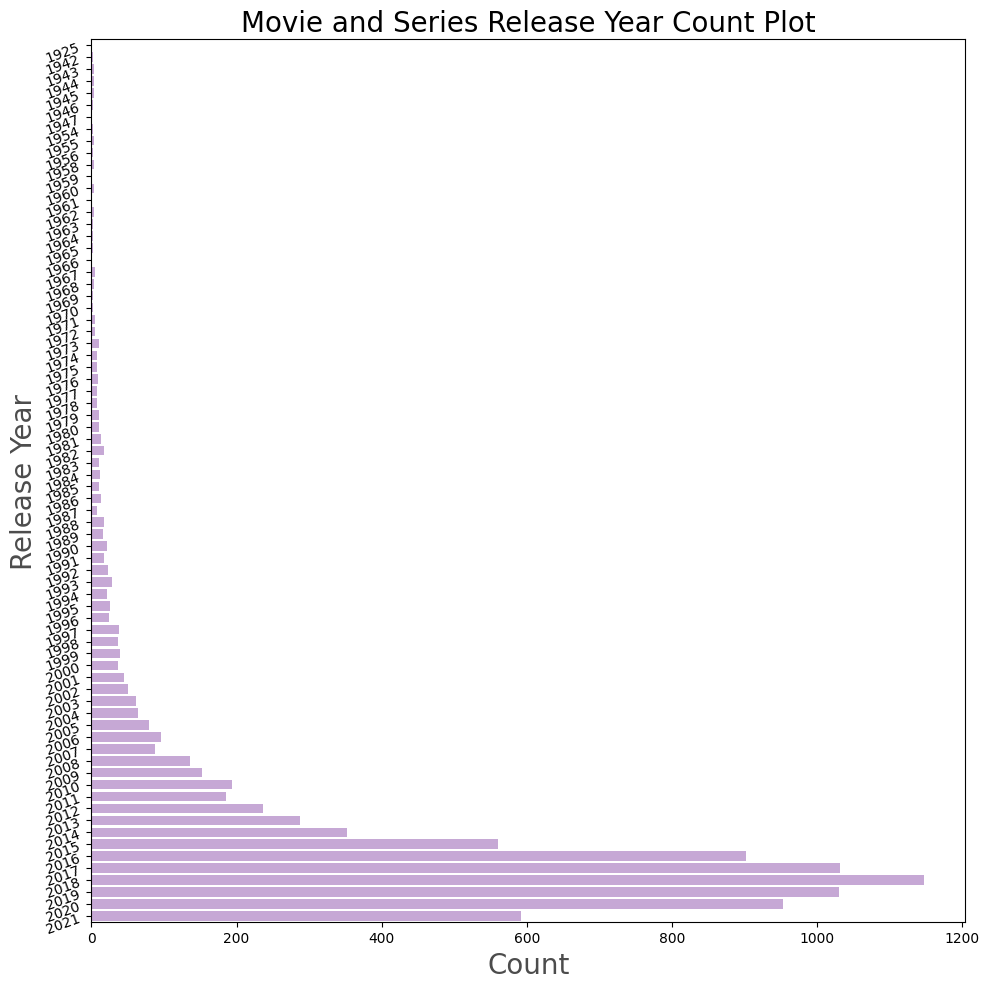

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['release_year'], color='#C9A0DC')
plt.yticks(rotation=20)
plt.title("Movie and Series Release Year Count Plot", fontsize=20)
plt.xlabel("Count", fontsize=20, alpha=0.7)
plt.ylabel("Release Year", fontsize=20, alpha=0.7)
plt.tight_layout()
plt.show()

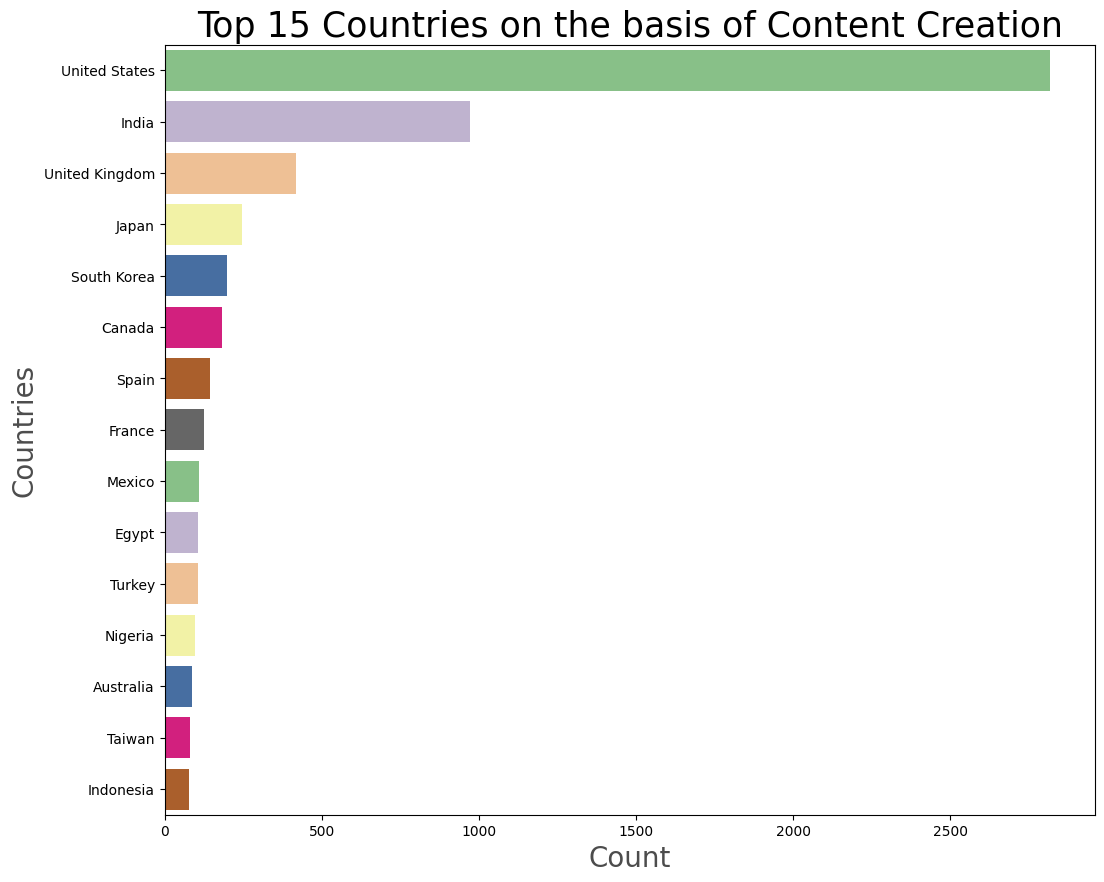

In [13]:
plt.figure(figsize=(12,10))
plt.title('Top 15 Countries on the basis of Content Creation', fontsize=25)
sns.countplot(data=data,y='country',order=data['country'].value_counts().index[0:15], palette='Accent')
plt.xlabel('Count', fontsize=20, alpha=0.7)
plt.ylabel('Countries', fontsize=20, alpha=0.7)
plt.show()

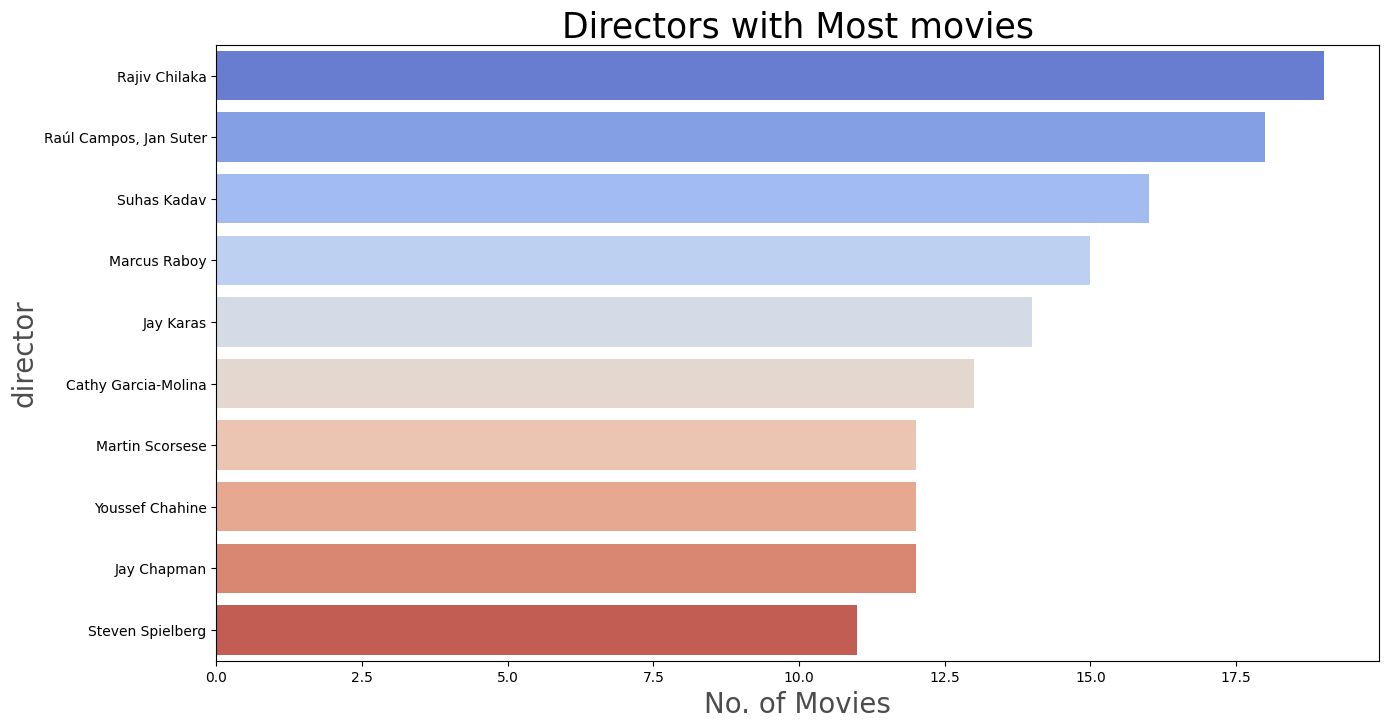

In [14]:
movie = data[data['type']=='Movie']
plt.figure(figsize=(15,8))
plt.title('Directors with Most movies', fontsize=25)
sns.countplot(y='director', data=movie, order=movie['director'].value_counts().index[0:10], palette='coolwarm')
plt.xlabel('No. of Movies', fontsize=20, alpha=0.7)
plt.ylabel('director', fontsize=20, alpha=0.7)
plt.show()

<ipython-input-15-1fd4b1249281>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration)


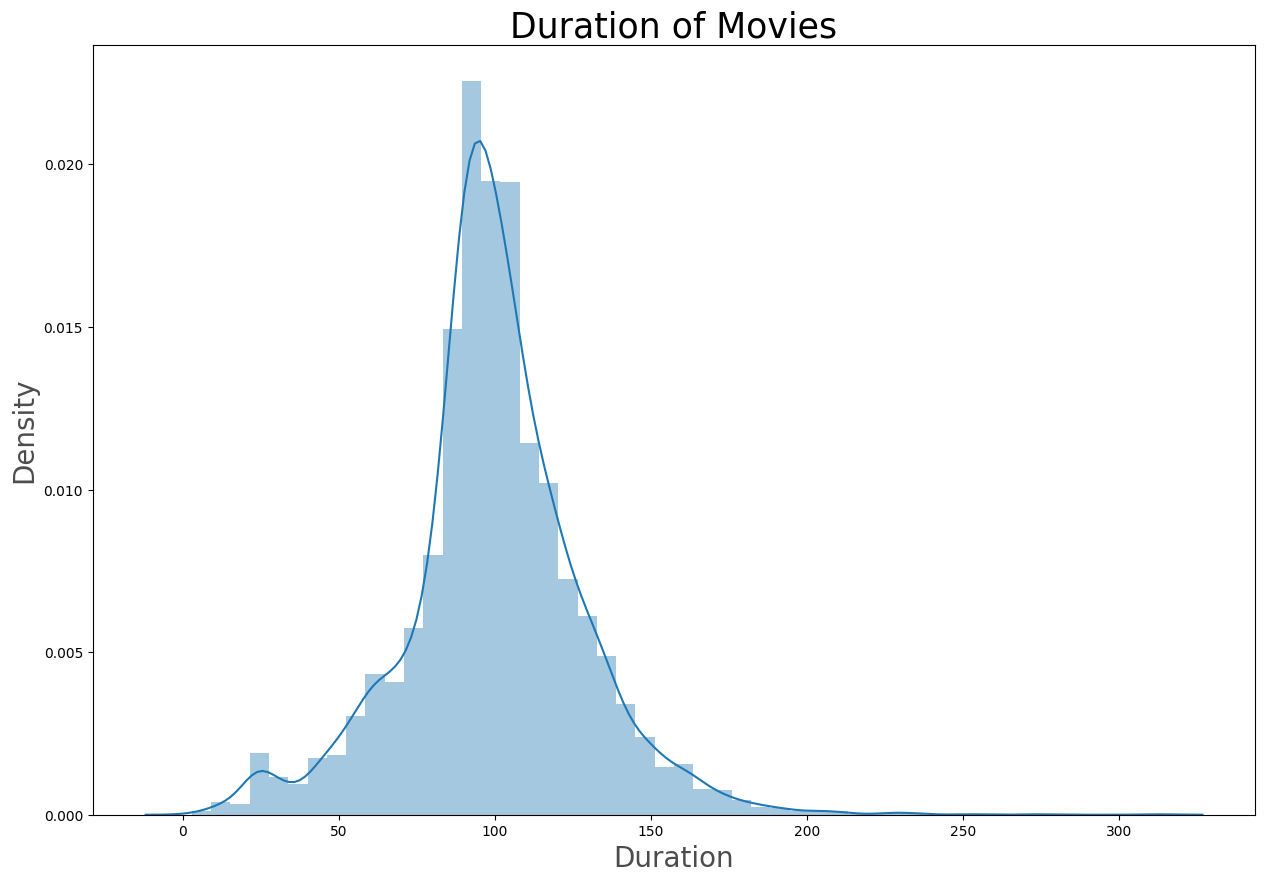

In [15]:
duration = []
movie = movie [movie['duration'].notna()]
for i in movie['duration']:duration.append(int(i.strip('min')))
plt.figure(1, figsize=(15,10))
plt.title("Duration of Movies", fontsize=25)
plt.xlabel('Duration', fontsize=20, alpha=0.7)
plt.ylabel('Density', fontsize=20, alpha=0.7)
sns.distplot(duration)
plt.show()

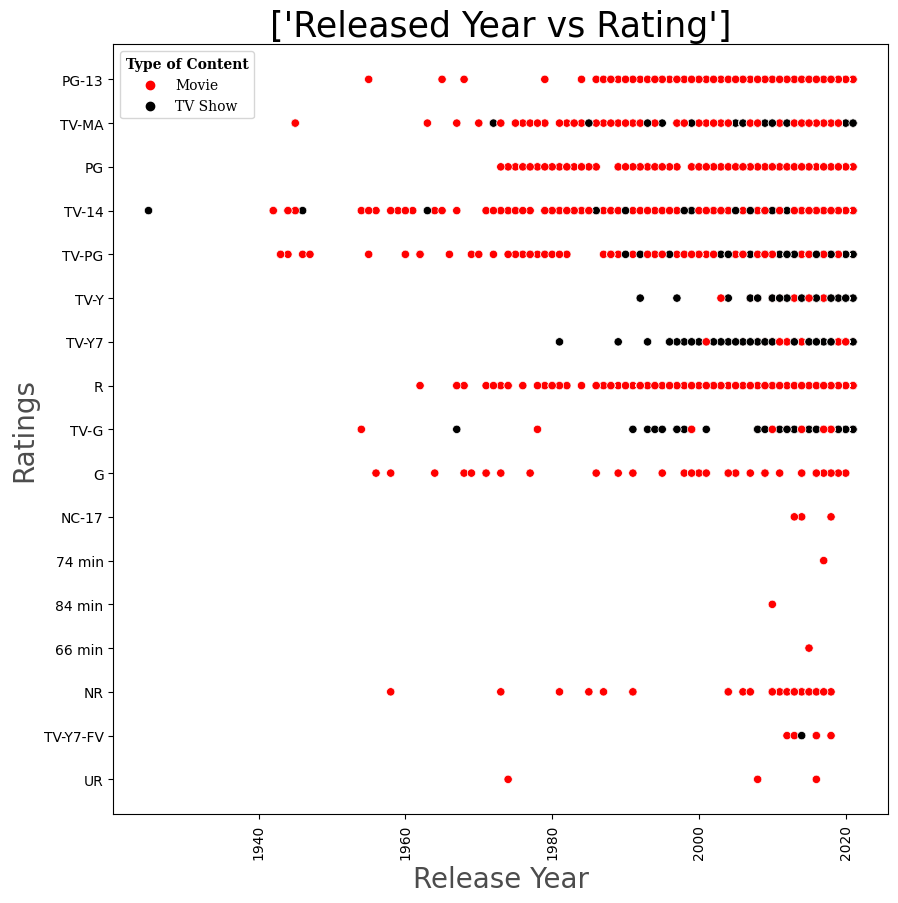

In [16]:
plt.figure(figsize=(10, 10))
new=sns.blend_palette(['red', 'black'],2)
plt.xticks(rotation=90)
sns.scatterplot(x='release_year', y='rating', hue="type", data=data, palette=new)
plt.title(["Released Year vs Rating"], fontsize=25)
plt.xlabel("Release Year", fontsize=20, alpha=0.7)
plt.ylabel("Ratings", fontsize=20, alpha=0.7)
leg=plt.legend (prop={'family': 'serif', 'size': 10})
leg.set_title("Type of Content", prop={'weight': 'bold', 'family': 'serif'})
plt.show()

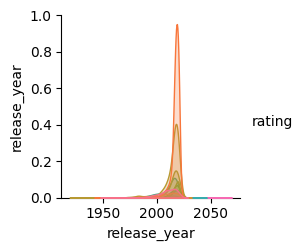

In [17]:
sns.pairplot(data, hue='rating')
plt.show()